In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv('C:/Users/91779/Desktop/train.csv')
train_copy = train.copy()

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.shape

(1460, 81)

# EDA

In [6]:
# save and drop train id as it of no use
train_id = train['Id']
train.drop("Id", axis = 1, inplace = True)
target = 'SalePrice_Log'
drop_similar = 1

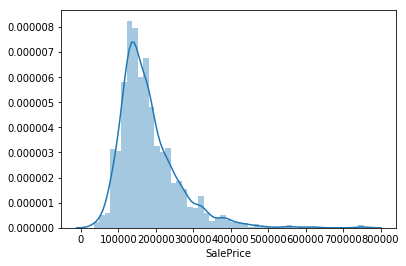

In [7]:
#check target variable
sns.distplot(train['SalePrice']);

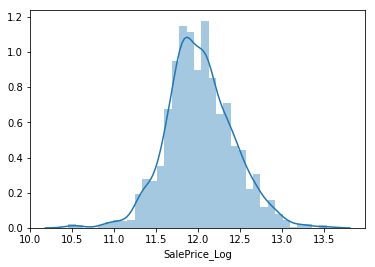

In [8]:
#convert into normal distributed
train['SalePrice_Log'] = np.log(train['SalePrice'])

# dropping old column
train.drop('SalePrice', axis= 1, inplace=True)
sns.distplot(train['SalePrice_Log']);

In [9]:
categorical_features = train.dtypes[train.dtypes == "object"].index
len(categorical_features)

43

In [10]:
numerical_features = train.dtypes[train.dtypes != "object"].index
len(numerical_features)

37

In [11]:
train[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice_Log
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429216


In [12]:
train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
(train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
FireplaceQu      47.260274
LotFrontage      17.739726
GarageType        5.547945
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageYrBlt       5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtQual          2.534247
BsmtCond          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
MasVnrType        0.547945
Electrical        0.068493
RoofMatl          0.000000
Exterior1st       0.000000
RoofStyle         0.000000
ExterQual         0.000000
Exterior2nd       0.000000
YearBuilt         0.000000
ExterCond         0.000000
Foundation        0.000000
YearRemodAdd      0.000000
SalePrice_Log     0.000000
OverallCond       0.000000
                   ...    
GarageArea        0.000000
PavedDrive        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
3SsnPorch         0.000000
BsmtUnfSF         0.000000
S

In [14]:
#fill missing values. for example fill none if pool is null in any row
columns_fillna = ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageQual','GarageCond','GarageFinish',
                  'GarageType', 'Electrical','KitchenQual', 'SaleType', 'Functional', 'Exterior2nd', 'Exterior1st','BsmtExposure',
                  'BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2','MSZoning', 'Utilities']

# replace 'NaN' with 'None' in these columns
for column in columns_fillna:
    train[column].fillna('None',inplace=True)

In [15]:
(train.isnull().sum()*100/train.isnull().count()).sort_values(ascending=False)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
SalePrice_Log     0.000000
Foundation        0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.000000
ExterQual         0.000000
ExterCond         0.000000
BsmtQual          0.000000
BsmtCond          0.000000
BsmtExposure      0.000000
BsmtFinType1      0.000000
BsmtFinSF1        0.000000
BsmtFinType2      0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
RoofStyle         0.000000
YearRemodAdd      0.000000
Heating           0.000000
LotConfig         0.000000
MSZoning          0.000000
LotArea           0.000000
Street            0.000000
Alley             0.000000
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
                   ...    
PoolArea          0.000000
GarageCars        0.000000
PoolQC            0.000000
Fence             0.000000
MiscFeature       0.000000
MiscVal           0.000000
M

In [16]:
# fillna with mean for the remaining columns as median will iccurate measure.
train.fillna(train.mean(), inplace=True)

In [17]:
train.isnull().sum().sum()

0

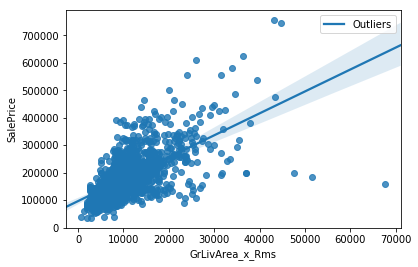

In [18]:
# check with varibale combinations
df = train_copy[['SalePrice', 'GrLivArea', 'TotRmsAbvGrd']]
df['GrLivArea_x_Rms'] = train_copy.GrLivArea*train_copy.TotRmsAbvGrd
sns.regplot(x='GrLivArea_x_Rms', y='SalePrice', data=df); 
plt.legend(['Outliers'])
del df

In [19]:
#remove outliers
train = train[train.GrLivArea * train.TotRmsAbvGrd < 45000]

In [20]:
for df in [train]:
    df['GrLivArea_Log'] = np.log(df['GrLivArea'])
    df.drop('GrLivArea', inplace= True, axis = 1)
    df['LotArea_Log'] = np.log(df['LotArea'])
    df.drop('LotArea', inplace= True, axis = 1)
       
#update numerical features    
numerical_features = train.dtypes[train.dtypes != "object"].index

In [21]:
#remove outliers
train = train.drop(train[(train['OverallQual']==10) & (train['SalePrice_Log']<12.3)].index)
train = train.drop(train[(train['GrLivArea_Log']>8.3) & (train['SalePrice_Log']<12.5)].index)

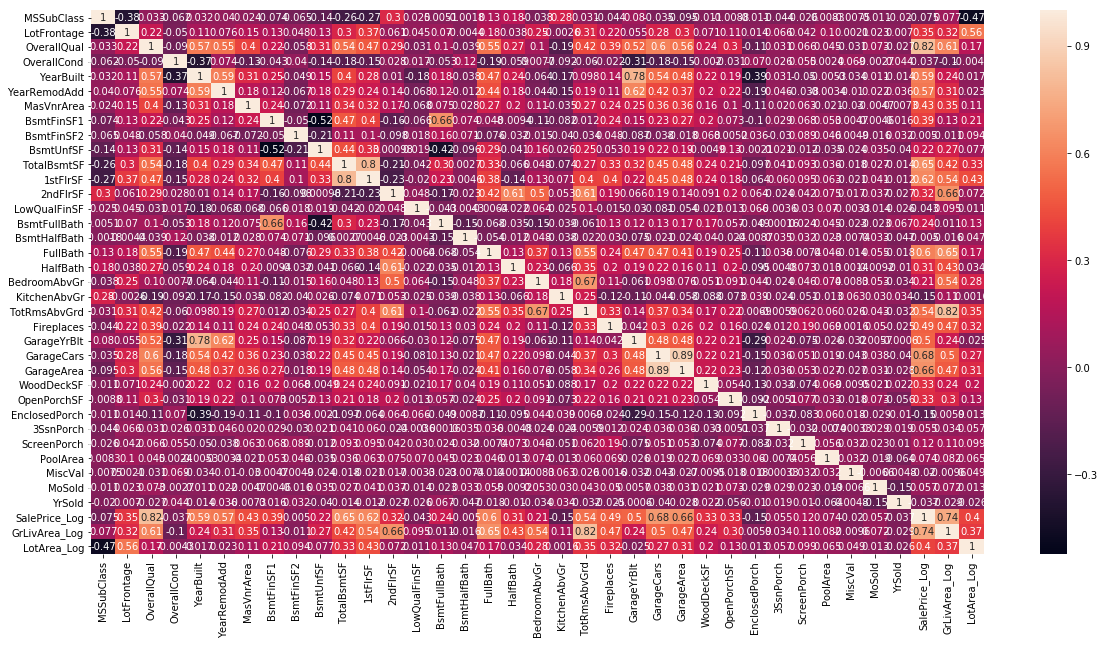

In [22]:
corr_df = train[numerical_features]
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corr_df.corr(),annot = True)

In [23]:
train.shape

(1457, 80)

In [24]:
# get numerical coulmns realted to target
corr_abs = train.corr().abs()
total_cols = len(numerical_features)
ser_cor = corr_abs.nlargest(total_cols, target)[target]
main_cols_numerical = list(ser_cor[ser_cor.values > 0.4].index)
useless_cols_numerical = list(ser_cor[ser_cor.values <= 0.4].index)

In [25]:
main_cols_numerical

['SalePrice_Log',
 'OverallQual',
 'GrLivArea_Log',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'LotArea_Log']

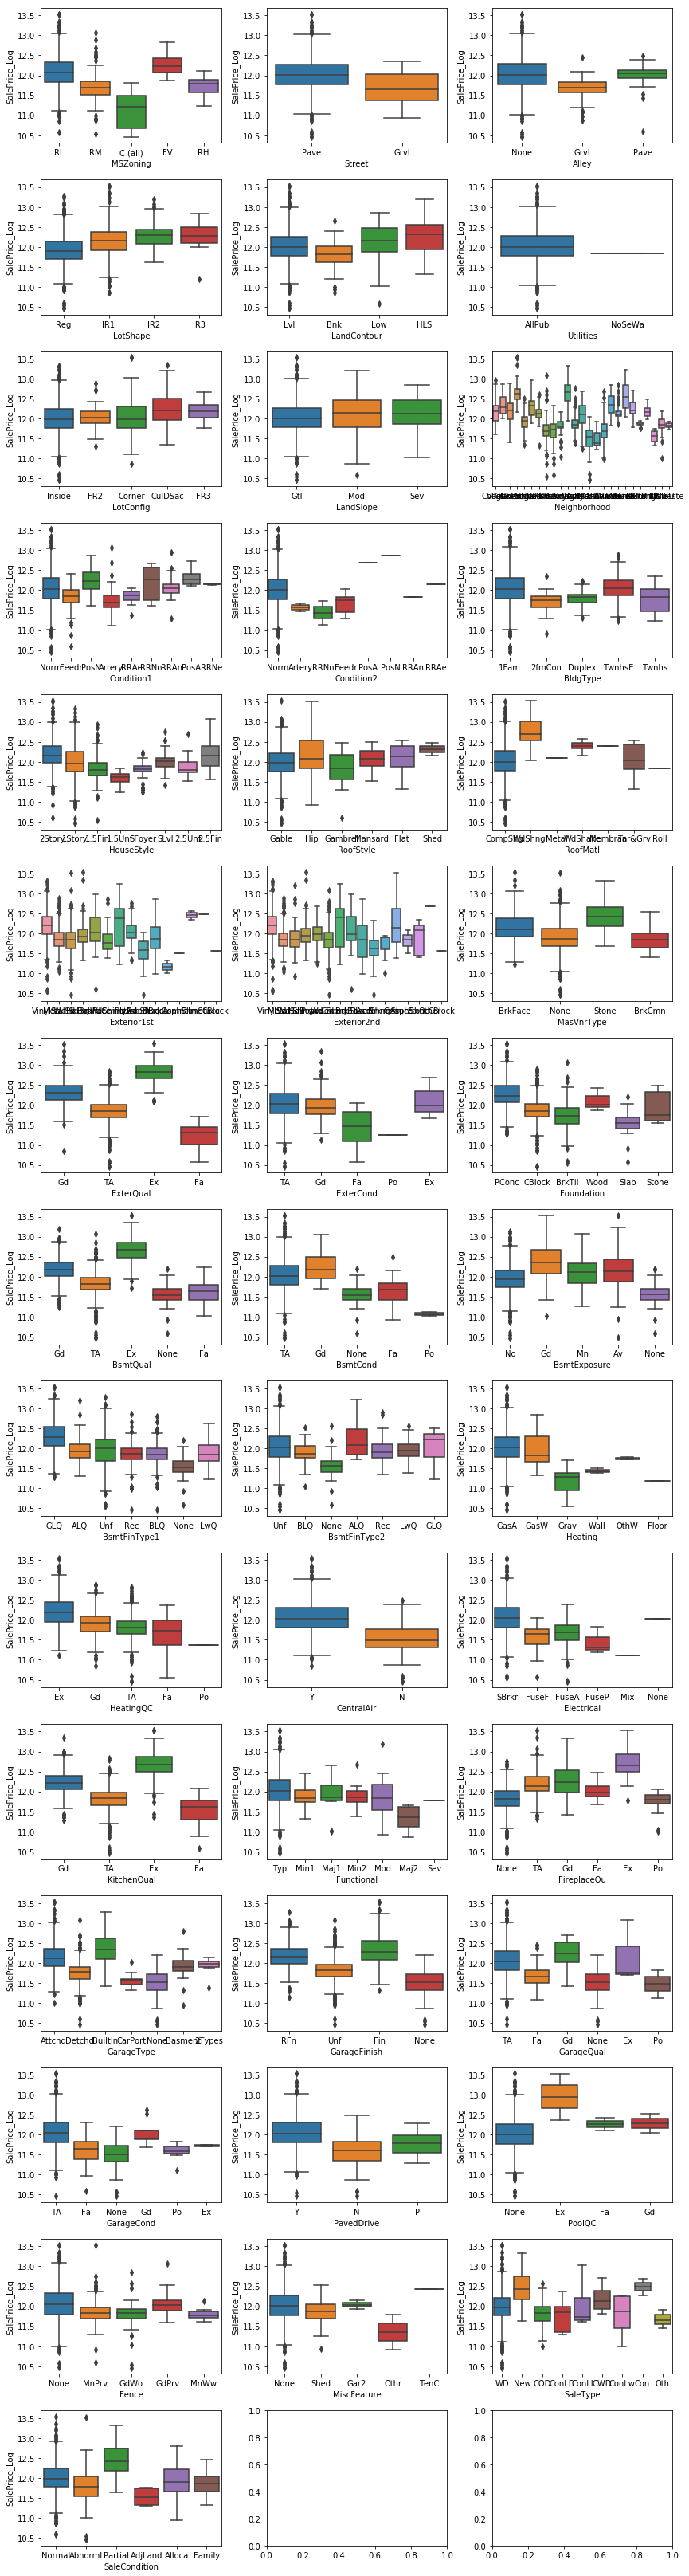

In [26]:
#  check category variables
li_category_features = list(categorical_features)

fig, axs = plt.subplots(15, 3, figsize=(12,45))
for row in range(0,15):
    for column in range(0,3):  
        index = row*3+column
        if index < len(li_category_features):
            sns.boxplot(x=li_category_features[index], y=target, data=train, ax = axs[row][column])
    
plt.tight_layout()    
plt.show() 

In [27]:
# get categorical coulmns realated to target
main_cols_categorical = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
useless_cols_categorical = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]
      

In [28]:
columns_to_drop = useless_cols_numerical + useless_cols_categorical
for df in [train]:
    df.drop(columns_to_drop, inplace= True, axis = 1)

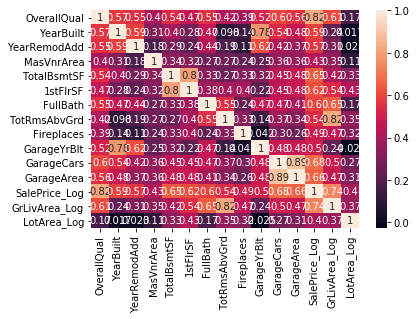

In [29]:
sns.heatmap(train.corr(),annot = True)

In [30]:
## CREATE DUMMY VARIABLES

# 'MSZoning'
msz_category = ['RM', 'RH']
msz_category1 = ['RL', 'FV'] 


# Neighborhood
ngbhd_category = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
ngbhd_category1 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
condition2_category = ['Norm', 'RRAe']
condition2_category1 = ['PosA', 'PosN'] 

# SaleType
SlType_category = ['Oth']
SlType_category1 = ['CWD']
SlType_category2 = ['New', 'Con']

In [31]:
for df in [train]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_category) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_category1) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(ngbhd_category) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(ngbhd_category1) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(condition2_category) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(condition2_category1) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlType_category) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlType_category1) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlType_category2) ), 'SlTy_num'] = 4 

In [32]:
# drop unused columns
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']
corr_abs_1 = train.corr().abs()

ser_corr_1 = corr_abs_1.nlargest(len(train), target)[target]
ser_corr_1   

SalePrice_Log    1.000000
OverallQual      0.821486
GrLivArea_Log    0.738398
NbHd_num         0.697447
ExtQ_num         0.684435
GarageCars       0.683133
KiQ_num          0.671952
BsQ_num          0.661815
GarageArea       0.657990
TotalBsmtSF      0.647511
1stFlrSF         0.620429
FullBath         0.595822
YearBuilt        0.588404
YearRemodAdd     0.565925
TotRmsAbvGrd     0.540290
GarageYrBlt      0.500877
Fireplaces       0.492484
MasVnrArea       0.433613
MSZ_num          0.410713
LotArea_Log      0.402747
CA_num           0.351549
SlTy_num         0.337597
Mas_num          0.313409
Elc_num          0.307011
Cond2_num        0.107597
Name: SalePrice_Log, dtype: float64

In [33]:
for df in [train] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(list(ser_corr_1[ser_corr_1.values <= 0.4].index), inplace= True, axis = 1) 

In [34]:
train.describe()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice_Log,GrLivArea_Log,LotArea_Log,MSZ_num,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
count,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000,1457.000000
mean,6.094029,1971.257378,1984.827042,102.829432,1052.271105,1158.658202,1.563487,6.505834,0.611531,1978.466365,1.767330,472.374056,12.023884,7.265431,9.108349,2.826356,1.562114,2.394647,1.587509,2.510638
std,1.376839,30.166849,20.647127,178.990026,415.000508,372.094244,0.549961,1.604467,0.642008,23.995200,0.745925,211.951145,0.399824,0.329726,0.513937,0.396645,0.665387,0.570616,0.637158,0.660963
min,1.000000,1872.000000,1950.000000,0.000000,0.000000,334.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,10.460242,5.811141,7.170120,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,1954.000000,1967.000000,0.000000,795.000000,882.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,336.000000,11.774520,7.028201,8.927977,3.000000,1.000000,2.000000,1.000000,2.000000
50%,6.000000,1973.000000,1994.000000,0.000000,991.000000,1086.000000,2.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,12.001505,7.285507,9.156201,3.000000,1.000000,2.000000,2.000000,2.000000
75%,7.000000,2000.000000,2004.000000,164.000000,1296.000000,1390.000000,2.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,12.273731,7.482119,9.358760,3.000000,2.000000,3.000000,2.000000,3.000000
max,10.000000,2010.000000,2010.000000,1600.000000,3206.000000,3228.000000,3.000000,12.000000,3.000000,2010.000000,4.000000,1390.000000,13.534473,8.406485,12.279532,3.000000,3.000000,4.000000,3.000000,4.000000


In [35]:
train.shape

(1457, 21)

In [36]:
# check correlation
corr = train.corr()
corr_abs = corr.abs()

nr_all_cols = len(train)
print (corr_abs.nlargest(len(train), target)[target])

SalePrice_Log    1.000000
OverallQual      0.821486
GrLivArea_Log    0.738398
NbHd_num         0.697447
ExtQ_num         0.684435
GarageCars       0.683133
KiQ_num          0.671952
BsQ_num          0.661815
GarageArea       0.657990
TotalBsmtSF      0.647511
1stFlrSF         0.620429
FullBath         0.595822
YearBuilt        0.588404
YearRemodAdd     0.565925
TotRmsAbvGrd     0.540290
GarageYrBlt      0.500877
Fireplaces       0.492484
MasVnrArea       0.433613
MSZ_num          0.410713
LotArea_Log      0.402747
Name: SalePrice_Log, dtype: float64


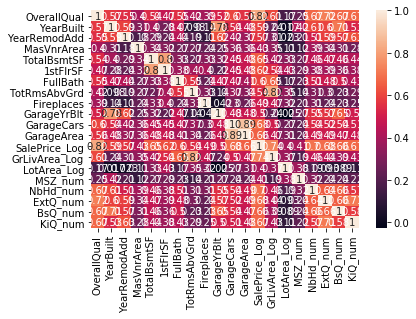

In [37]:
sns.heatmap(train.corr(),annot = True)

In [38]:
# remove clumns
cols = corr_abs.nlargest(len(train), target)[target].index
cols = list(cols)

if drop_similar == 1 :
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols: 
            cols.remove(col)

In [39]:
cols = list(cols)
print(cols)

['SalePrice_Log', 'OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [40]:
train.shape

(1457, 21)

In [41]:
feats = cols.copy()
feats.remove('SalePrice_Log')

print(feats)

['OverallQual', 'GrLivArea_Log', 'NbHd_num', 'ExtQ_num', 'GarageCars', 'KiQ_num', 'BsQ_num', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'MasVnrArea', 'MSZ_num', 'LotArea_Log']


In [42]:
dframe_train = train[feats]

y = train[target]

In [43]:
dframe_train.shape

(1457, 15)

In [44]:
# scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train_scaled = scaler.fit_transform(dframe_train)

In [45]:
df_train_scaled = pd.DataFrame(df_train_scaled)
df_train_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.658234,0.542510,0.658319,1.061240,0.312028,0.740631,0.647615,-0.473104,0.793990,1.052597,0.880471,-0.952855,0.520714,0.437934,-0.129295
1,-0.068317,-0.379165,0.658319,-0.691852,0.312028,-0.772833,0.647615,0.505544,0.793990,0.157267,-0.427666,0.605293,-0.574695,0.437934,0.119063
2,0.658234,0.674437,0.658319,1.061240,0.312028,0.740631,0.647615,-0.318835,0.793990,0.986276,0.832022,0.605293,0.330694,0.437934,0.427777
3,0.658234,0.554903,0.658319,-0.691852,1.653105,0.740631,-0.922393,-0.714151,-1.024946,-1.865514,-0.718363,0.605293,-0.574695,0.437934,0.108899
4,1.384785,1.304174,2.161720,1.061240,1.653105,0.740631,0.647615,0.223520,0.793990,0.953115,0.735123,0.605293,1.381392,0.437934,0.889257


In [46]:
#prepare data
X = dframe_train.copy()
y = train[target]
X_test = dframe_train.copy()


In [47]:
X_scaled = df_train_scaled.copy()
y_scaled = train[target]
X_test_scaled = df_train_scaled.copy()

In [48]:
# model building
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

In [49]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Lasso

In [50]:
# lasso
from sklearn.linear_model import Lasso
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                       7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()
# cross validation
model_CV_lasso = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            
model_CV_lasso.fit(X_train, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [51]:
lasso_score = np.sqrt(-model_CV_lasso.best_score_)
lasso_score

0.3128149266333566

In [52]:
# check results
cv_results1 = pd.DataFrame(model_CV_lasso.cv_results_)
cv_results1 = cv_results1[cv_results1['param_alpha']<=200]
cv_results1.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003918,0.001140,0.000493,0.000620,0.0001,{'alpha': 0.0001},-0.099156,-0.099458,-0.092625,-0.098518,...,-0.098030,0.002771,2,-0.096266,-0.095447,-0.098011,-0.095999,-0.095344,-0.096213,0.000962
1,0.003089,0.000851,0.000413,0.000506,0.001,{'alpha': 0.001},-0.098614,-0.099871,-0.092772,-0.098000,...,-0.097853,0.002653,1,-0.096046,-0.095275,-0.097836,-0.095891,-0.095279,-0.096065,0.000939
2,0.002472,0.000518,0.000000,0.000000,0.01,{'alpha': 0.01},-0.100914,-0.103801,-0.098054,-0.104573,...,-0.102190,0.002411,3,-0.101116,-0.099524,-0.101751,-0.100948,-0.099682,-0.100604,0.000862
3,0.001624,0.001540,0.000199,0.000398,0.05,{'alpha': 0.05},-0.150218,-0.147074,-0.143222,-0.147235,...,-0.147710,0.002709,4,-0.146032,-0.145696,-0.147070,-0.147270,-0.146051,-0.146424,0.000626
4,0.001924,0.001824,0.000353,0.000438,0.1,{'alpha': 0.1},-0.172016,-0.158557,-0.160517,-0.158318,...,-0.162882,0.005161,5,-0.160533,-0.161003,-0.162063,-0.162747,-0.161641,-0.161597,0.000778


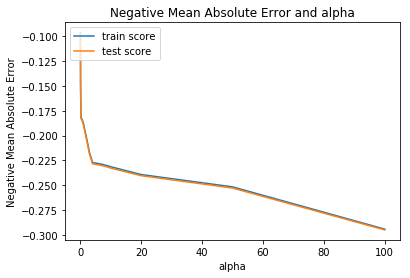

In [53]:
# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.plot(cv_results1['param_alpha'], cv_results1['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [54]:
# get max value
import numpy as np
xmax = cv_results1['param_alpha'][np.argmax(cv_results1['mean_test_score'])]
ymax = cv_results1['mean_test_score'].max()
xmax

0.001

In [55]:
# try with diffrent alpha
lasso = Lasso(alpha=2)
lasso.fit(X_train, y_train)
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00049247, 0.        , 0.00182835,
       0.00098243, 0.        , 0.00037028, 0.        , 0.        ])

In [56]:
# try with diffrent alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 6.76830197e-02,  3.46288561e-01,  3.33125057e-02,  2.82992932e-03,
        3.94090472e-02,  4.31258196e-02,  3.23205682e-02,  1.43891765e-04,
       -1.94951698e-02,  1.09995218e-03,  1.97758607e-03,  3.76796215e-02,
        6.58912068e-05,  6.40678104e-02,  8.60605582e-02])

In [57]:
lasso.coef_

array([ 6.76830197e-02,  3.46288561e-01,  3.33125057e-02,  2.82992932e-03,
        3.94090472e-02,  4.31258196e-02,  3.23205682e-02,  1.43891765e-04,
       -1.94951698e-02,  1.09995218e-03,  1.97758607e-03,  3.76796215e-02,
        6.58912068e-05,  6.40678104e-02,  8.60605582e-02])

In [58]:
# get ranks
for col,rank in  zip(feats,lasso.coef_):
    print(col,'---->',rank*100)

OverallQual ----> 6.768301971007179
GrLivArea_Log ----> 34.62885610784848
NbHd_num ----> 3.331250574190445
ExtQ_num ----> 0.2829929315630287
GarageCars ----> 3.940904716796372
KiQ_num ----> 4.312581964081804
BsQ_num ----> 3.2320568174535094
TotalBsmtSF ----> 0.014389176492873784
FullBath ----> -1.9495169838050317
YearBuilt ----> 0.10999521830631442
YearRemodAdd ----> 0.19775860682297877
Fireplaces ----> 3.7679621536161423
MasVnrArea ----> 0.0065891206848445755
MSZ_num ----> 6.406781044294352
LotArea_Log ----> 8.606055824643912


In [59]:
# Important features in order are:
# GrLivArea_Log 
# LotArea_Log 
# MSZ_num  
# OverallQual
# GarageCars 
# Fireplaces 
# KiQ_num 
# NbHd_num 
# BsQ_num 
# ExtQ_num 
# YearRemodAdd 
# YearBuilt 
# MasVnrArea 
# TotalBsmtSF 
# FullBath 


In [60]:
# try with diffrent alpha
lasso = Lasso(alpha=5)
lasso.fit(X_train, y_train)
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0005462 , 0.        , 0.        ,
       0.        , 0.        , 0.00034431, 0.        , 0.        ])

In [61]:
# try with diffrent alpha
lasso = Lasso(alpha=3)
lasso.fit(X_train, y_train)
lasso.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00052589, 0.        , 0.00095027,
       0.        , 0.        , 0.00037622, 0.        , 0.        ])

# Ridge

In [62]:
#ridge
ridge = Ridge()
parameters = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 
                       7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000] }
model_cv_ridge = GridSearchCV(estimator = ridge, param_grid = parameters, scoring= 'neg_mean_absolute_error', cv = 5,
                          return_train_score=True,verbose = 1) 
model_cv_ridge.fit(X_train, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [63]:
# check results
cv_results = pd.DataFrame(model_cv_ridge.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007908,0.000848,0.000883,0.000451,0.0001,{'alpha': 0.0001},-0.099216,-0.099415,-0.092603,-0.098579,...,-0.098051,0.002792,23,-0.096306,-0.095481,-0.098039,-0.096026,-0.095371,-0.096245,0.000961
1,0.005747,0.001166,0.000938,0.001126,0.001,{'alpha': 0.001},-0.099216,-0.099415,-0.092603,-0.098579,...,-0.098051,0.002792,22,-0.096306,-0.095481,-0.098039,-0.096026,-0.095371,-0.096244,0.000961
2,0.003130,0.000569,0.000411,0.000504,0.01,{'alpha': 0.01},-0.099216,-0.099416,-0.092601,-0.098577,...,-0.098050,0.002792,21,-0.096304,-0.095480,-0.098038,-0.096024,-0.095370,-0.096243,0.000961
3,0.001885,0.001037,0.000199,0.000399,0.05,{'alpha': 0.05},-0.099216,-0.099419,-0.092592,-0.098572,...,-0.098046,0.002794,20,-0.096299,-0.095475,-0.098034,-0.096018,-0.095366,-0.096238,0.000961
4,0.003275,0.001078,0.000537,0.000453,0.1,{'alpha': 0.1},-0.099216,-0.099424,-0.092581,-0.098566,...,-0.098041,0.002796,19,-0.096293,-0.095469,-0.098029,-0.096011,-0.095361,-0.096232,0.000961


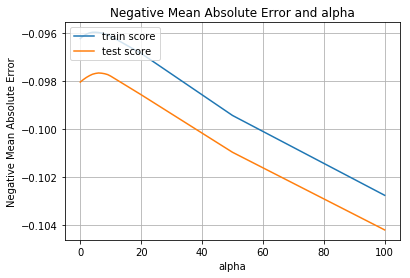

In [64]:
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.grid()
plt.show()


In [65]:
# get max value
import numpy as np
xmax = cv_results['param_alpha'][np.argmax(cv_results['mean_test_score'])]
ymax = cv_results['mean_test_score'].max()
xmax

6.0

In [66]:
# try with diffrent alpha
ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 6.93634974e-02,  3.08886243e-01,  3.52950186e-02,  8.96888905e-03,
        4.32196651e-02,  4.35303089e-02,  3.58278127e-02,  1.41302364e-04,
       -1.65957662e-02,  9.03457719e-04,  1.95851809e-03,  4.21941649e-02,
        6.80565366e-05,  6.78737816e-02,  8.97755275e-02])

In [67]:
# try with diffrent alpha
ridge = Ridge(alpha=6)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 6.84058422e-02,  3.22424860e-01,  3.52622945e-02,  8.66728423e-03,
        4.25550637e-02,  4.38822857e-02,  3.63999805e-02,  1.40364543e-04,
       -2.03195709e-02,  9.36485549e-04,  1.94916602e-03,  4.11655951e-02,
        6.61792299e-05,  6.88474183e-02,  8.89602154e-02])

In [68]:
#get ranks
for col,rank in  zip(feats,ridge.coef_):
    print(col,'---->',rank*100)

OverallQual ----> 6.840584223761262
GrLivArea_Log ----> 32.242486035677764
NbHd_num ----> 3.5262294545931745
ExtQ_num ----> 0.8667284226067459
GarageCars ----> 4.255506372874121
KiQ_num ----> 4.388228574877926
BsQ_num ----> 3.639998048253402
TotalBsmtSF ----> 0.014036454343341321
FullBath ----> -2.031957087215042
YearBuilt ----> 0.09364855487738807
YearRemodAdd ----> 0.1949166015622607
Fireplaces ----> 4.116559507601621
MasVnrArea ----> 0.006617922988968498
MSZ_num ----> 6.8847418310451065
LotArea_Log ----> 8.89602153584623


In [69]:
# Important features in order are:
# GrLivArea_Log
# LotArea_Log 
# MSZ_num  
# OverallQual
# GarageCars 
# Fireplaces 
# KiQ_num 
# NbHd_num 
# BsQ_num 
# ExtQ_num 
# YearRemodAdd 
# YearBuilt 
# MasVnrArea 
# TotalBsmtSF 
# FullBath 

In [70]:
ridge_score = (np.sqrt(-model_cv_ridge.best_score_))
ridge_score

0.3125268100975716

In [71]:
ridge_score = (np.sqrt(-model_cv_ridge.best_score_))
ridge_score

0.3125268100975716

In [72]:
# Lasso is better after calculating best score.

In [73]:
# Model comparison wrt RMSE

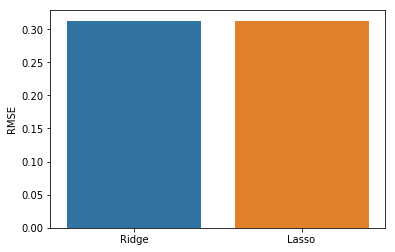

In [74]:
list_scores = [ridge_score, lasso_score]
list_regressors = ['Ridge','Lasso']
fig, ax = plt.subplots()
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('RMSE')
plt.show()